In [84]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import *
from models import *
from functools import partial

import scienceplots

plt.style.use(['science', 'nature'])

Figure 1. Bifurcation analysis, role of H2O2 injection

In [85]:
# -------------------Fig 1a
import matplotlib.ticker as mticker
from sympy import *
params2 = np.array([22, 3, 0.55, 18, 1e3, 1e3])/0.2
consts2 = [0.11, 2]
init_cond2 = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
                         'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model_std = oscillation(full_model_4vars_dict, params2, consts2, init_cond2)
c_std, t_std = model_std.simulate(calcall=True, t=10)

# --------------------Fig 1b
params = np.array([22, 3, 0.55, 18, 1e3, 1e3])
consts = [0.11, 2]
init_cond = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
                         'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model_osc = oscillation(full_model_4vars_dict, params, consts, init_cond)
c_osc, t_osc = model_osc.simulate(calcall=True, t=5)

# ----------------------Fig 1c
params3 = np.array([22, 3, 0.55, 18, 1e3, 1e3])/20
consts3 = [0.11, 2]
init_cond3 = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
                         'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model_std2 = oscillation(full_model_4vars_dict, params3, consts3, init_cond3)
c_std2, t_std2 = model_std2.simulate(calcall=True, t=10)

# ----------------------Fig 1d
cA2, cS, cO, cM = symbols('c_{A_2}, c_{S}, c_{O}, c_{M}')
alpha, beta, theta, phi, delta, ep, lam = symbols(
    'alpha beta theta phi delta epsilon lambda')
m = Rational(2, 1)
cA = 2 * (1 - cA2) - lam * (cS + cM)
dcA2dt = cO * cA - alpha * cM * cA2 - theta * cA2
dcSdt = alpha/lam * cM * cA2 + theta/lam * \
    cA2 - phi * cS - delta * (cS**m - cM)
dcOdt = ep * (1 - cO * cA)
dcMdt = delta * (cS**m - cM) - beta * cM
sol = solve([dcA2dt, dcSdt, dcOdt, dcMdt], (cA2, cS, cO, cM))
cA2_0, cS_0, cO_0, cM_0 = sol[1]
J = Matrix([dcA2dt, dcSdt, dcOdt, dcMdt]).jacobian((cA2, cS, cO, cM))
J0 = J.subs({cA2: cA2_0, cS: cS_0, cO: cO_0, cM: cM_0})
rr = np.concatenate([np.linspace(0.4, 1, 10), np.linspace(1.1, 3, 10)])

rel = []
iml = []
rl = []
for r in rr:
    eimg_c = []
    params = np.array([22, 3, 0.55, 18, 1e3, 1e3])/r
    J0_n = J0.subs({alpha: params[0], beta: params[1], theta: params[2],
                   phi: params[3], delta: params[4], ep: params[5], lam: 0.17})
    e = J0_n.eigenvals()
    eimg = [ei for ei in e if im(ei) != 0]
    for i in eimg:
        for j in eimg:
            if i != j and conjugate(i) == j:
                eimg_c = [i, j]
                rl.append(r)
    rel = rel + [re(e) for e in eimg_c]
    iml = iml + [im(e) for e in eimg_c]

In [86]:
def plot_std(ax):
    name = ['$c_{A_2}$', '$c_{S}$', '$c_{A}$']
    c = ['violet', 'royalblue', 'tomato']
    for i, n in enumerate(name):
        ax.plot(t_std, c_std[i], label=n, c=c[i])
        ax.legend(loc=0)
        ax.set_ylim((-0.1, 4))


def plot_osc(ax):
    name = ['$c_{A_2}$', '$c_{S}$', '$c_{A}$']
    c = ['violet', 'royalblue', 'tomato']
    for i, n in enumerate(name):
        ax.plot(t_osc, c_osc[i], label=n, c=c[i])
        ax.legend(loc=0)
        ax.set_ylim((-0.1, 4))


def plot_std2(ax):
    name = ['$c_{A_2}$', '$c_{S}$', '$c_{A}$']
    c = ['violet', 'royalblue', 'tomato']
    for i, n in enumerate(name):
        ax.plot(t_std2, c_std2[i], label=n, c=c[i])
        ax.legend(loc='right')
        ax.set_ylim((-0.1, 20))


def plot_bfn(ax, fig):
    ax.axhline(0, c='grey')
    ax.axvline(0, c='grey')
    fig.colorbar(ax.scatter(rel, iml, c=rl), ticks=[0.5, 3], format=mticker.FixedFormatter(
        ['Low', 'High']), label='$H_2O_2$ injection rate')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')

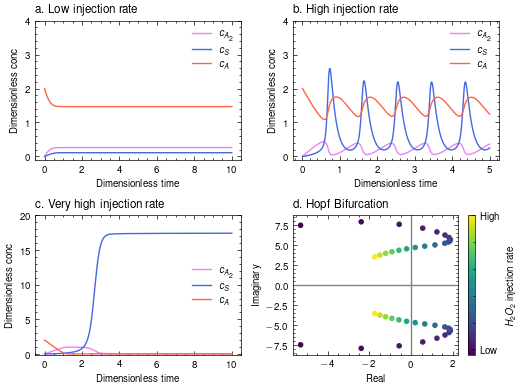

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(16/3, 4))

plot_std(ax[0][0])
plot_osc(ax[0][1])
plot_std2(ax[1][0])
plot_bfn(ax[1][1], fig)

title = ['a. Low injection rate', 'b. High injection rate',
         'c. Very high injection rate', 'd. Hopf Bifurcation']
for i, a in enumerate(ax.flatten()):
    a.set_title(title[i], loc='left')
for a in [ax[0][0], ax[0][1], ax[1][0]]:
    a.set_xlabel('Dimensionless time')
    a.set_ylabel('Dimensionless conc')

plt.tight_layout()

fig.savefig('figs/fig1.png', dpi=300)

Figure 2: fitting experimental data

In [88]:
import matplotlib.image as mpimg

In [89]:
files = [r'Data_sets/C82_fig2a_50_Chem_MH.csv',
         r'Data_sets/C82_fig2a_100_Chem_MH.csv', r'Data_sets/C82_fig2a_200_Chem_MH.csv']

df_MH_Chem_fig2a_50, df_MH_Chem_fig2a_100, df_MH_Chem_fig2a_200 = [
    pd.read_csv(file) for file in files]
df_list = [df_MH_Chem_fig2a_50, df_MH_Chem_fig2a_100, df_MH_Chem_fig2a_200]

cA2_tol = 14.5
CMC_3a = 1.56
rexts = [7, 14, 28]

for df, rext in zip(df_list, rexts):
    tau = cA2_tol/rext
    df['cS'] /= CMC_3a
    df['tS'] /= tau
    df['tA2'] /= tau

# ------------Parameters fitted from experiments--------
rates = [2311.4, 914.9, 16.002, 370.02, 1e4, 1e4]
# ------------------------------------------------------
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 14
tau = 14.5 / rext
lam, m = 0.11, 2
td1, td2 = 0.02, 0.02

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_100 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_100.add_exp_data(df_MH_Chem_fig2a_100)
delayed_model_100.set_init_cond([0, 0, 0, 0])
c100, t100 = delayed_model_100.simulate(exp=True, calcall=True, acc=200)

c100 = c100 * CMC_3a
t100 = t100 * tau

c100_exp = delayed_model_100._exp_data['cS'] * CMC_3a
t100_exp = delayed_model_100._exp_data['tS'] * tau

# ---------------------Testing 1---------------------------------
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 7
tau = 14.5 / rext
lam, m = 0.11, 2
td1, td2 = 0.02/2, 0.02/2

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_50 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_50.add_exp_data(df_MH_Chem_fig2a_50)
delayed_model_50.set_init_cond([0, 0, 0, 0])
c50, t50 = delayed_model_50.simulate(exp=True, calcall=True, acc=200)

c50 = c50 * CMC_3a
t50 = t50 * tau

c50_exp = delayed_model_50._exp_data['cS'] * CMC_3a
t50_exp = delayed_model_50._exp_data['tS'] * tau

# -------------------Testing 2------------------------------------
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 28
tau = 14.5 / rext
lam, m = 0.11, 2
td1, td2 = 0.02*2, 0.02*2

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_200 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_200.add_exp_data(df_MH_Chem_fig2a_200)
delayed_model_200.set_init_cond([0, 0, 0, 0])
c200, t200 = delayed_model_200.simulate(exp=True, calcall=True, acc=200)

c200 = c200 * CMC_3a
t200 = t200 * tau

c200_exp = delayed_model_200._exp_data['cS'] * CMC_3a
t200_exp = delayed_model_200._exp_data['tS'] * tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.         0.01858045]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


/Users/zhihengzhang/Documents/01_Research/03_Lab-SPF/Chemical_Oscillation_Model/osc_toolkit.py:289: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])
clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.         0.03450656]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


In [90]:
def plot_diagram(ax):
    pic = mpimg.imread('fitting.png')
    ax.imshow(pic, aspect="auto")
    ax.set(xticks=[], yticks=[])


def plot_100(ax):
    ax.plot(t100, c100[1], label='Simulation', c='royalblue')
    ax.plot(t100_exp, c100_exp, marker='.', label='Experiment', c='navy')
    ax.set_ylim([-0.05, 3.5])
    ax.legend(loc='upper right')


def plot_50(ax):
    ax.plot(t50, c50[1], label='Simulation', c='limegreen')
    ax.plot(t50_exp, c50_exp, marker='.', label='Experiment', c='green')
    ax.set_ylim([-0.05, 3.5])
    ax.legend(loc='upper right')


def plot_200(ax):
    ax.plot(t200, c200[1], label='Simulation', c='limegreen')
    ax.plot(t200_exp, c200_exp, marker='.', label='Experiment', c='green')
    ax.set_ylim([-0.05, 3.5])
    ax.legend(loc='upper right')

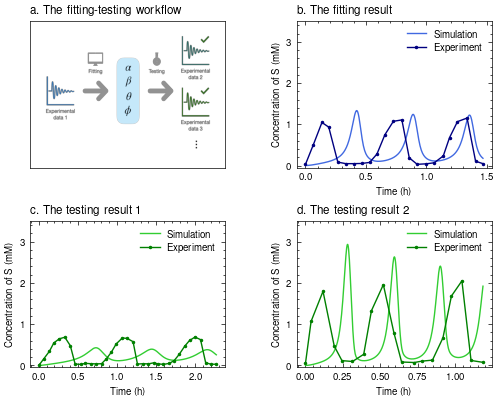

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(16/3, 4), constrained_layout=True)

plot_diagram(ax[0][0])
plot_100(ax[0][1])
plot_50(ax[1][0])
plot_200(ax[1][1])


title = ['a. The fitting-testing workflow', 'b. The fitting result',
         'c. The testing result 1', 'd. The testing result 2']
xlabel = ['', 'Time (h)', 'Time (h)', 'Time (h)']
ylabel = [
    '', 'Concentration of S (mM)', 'Concentration of S (mM)', 'Concentration of S (mM)']

for i, a in enumerate(fig.axes):
    a.set_title(title[i], loc='left')
    a.set_xlabel(xlabel[i])
    a.set_ylabel(ylabel[i])
    a.set_box_aspect(3/4)

plt.savefig('figs/fig2.png', dpi=300)

Figure 3. Spell "OXFORD"

In [92]:
tau1 = 14.5/18.2
tau2 = 14.5/42

rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 42
lam, m = 0.11, 2
td1, td2 = 0.02*3, 0.02*3

# Definition of the model 300
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_300 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_300.set_init_cond([0, 0, 0, 0])

rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 18.2
lam, m = 0.11, 2
td1, td2 = 0.02*1.3, 0.02*1.3

# Definition of the model 130
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_130 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_130.set_init_cond([0, 0, 0, 0])

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0, 0, 0, 0]


In [93]:
delayed_model_130.set_init_cond([0, 0, 0, 0])
delayed_model_300.set_init_cond([0, 0, 0, 0])
sol1, t1 = delayed_model_130.simulate(t=1.7, acc=150)

t_O = t1*tau1
c_O = delayed_full_4vars['calc_all'](sol1, delayed_model_130._consts)
cS_O = c_O[1] * CMC_3a

delayed_model_130.set_init_cond([0, 0, 0, 0])
sol2, t2 = delayed_model_130.simulate(t=0.7, acc=150)
delayed_model_300.set_init_cond(sol2[-1])
sol3, t3 = delayed_model_300.simulate(t=1.5, acc=150)
delayed_model_130.set_init_cond(sol3[-1])
sol4, t4 = delayed_model_130.simulate(t=0.5, acc=150)

t_X = np.concatenate(
    (t2*tau1, t3*tau2 + t2[-1]*tau1, t4*tau1 + t3[-1]*tau2 + t2[-1]*tau1))
sol_X = np.concatenate((sol2, sol3, sol4))
c_X = delayed_full_4vars['calc_all'](sol_X, delayed_model_130._consts)
cS_X = c_X[1] * CMC_3a

delayed_model_300.set_init_cond([0, 0, 0, 0])
sol5, t5 = delayed_model_300.simulate(t=1.7, acc=150)
delayed_model_130.set_init_cond(sol5[-1])
sol6, t6 = delayed_model_130.simulate(t=0.5, acc=150)
delayed_model_300.set_init_cond(sol6[-1])
sol7, t7 = delayed_model_300.simulate(t=0.8, acc=150)

t_F = np.concatenate(
    (t5*tau2, t6*tau1 + t5[-1]*tau2, t7*tau2 + t6[-1]*tau1 + t5[-1]*tau2))
sol_F = np.concatenate((sol5, sol6, sol7))
c_F = delayed_full_4vars['calc_all'](sol_F, delayed_model_130._consts)
cS_F = c_F[1] * CMC_3a

delayed_model_300.set_init_cond([0, 0, 0, 0])
sol8, t8 = delayed_model_300.simulate(t=0.8, acc=150)

delayed_model_130.set_init_cond(sol8[-1])
sol9, t9 = delayed_model_130.simulate(t=0.7, acc=150)

delayed_model_300.set_init_cond(sol9[-1])
sol10, t10 = delayed_model_300.simulate(t=0.9, acc=150)

t_R = np.concatenate(
    (t8*tau2, t9*tau1 + t8[-1]*tau2, t10*tau2 + t9[-1]*tau1 + t8[-1]*tau2))
sol_R = np.concatenate((sol8, sol9, sol10))
c_R = delayed_full_4vars['calc_all'](sol_R, delayed_model_130._consts)
cS_R = c_R[1] * CMC_3a

delayed_model_130.set_init_cond([0, 0, 0, 0])
sol11, t11 = delayed_model_130.simulate(t=0.7, acc=150)

delayed_model_300.set_init_cond(sol11[-1])
sol12, t12 = delayed_model_300.simulate(t=1.5, acc=150)

t_D = np.concatenate((t11*tau1, t12*tau2 + t11[-1]*tau1))
sol_D = np.concatenate((sol11, sol12))
c_D = delayed_full_4vars['calc_all'](sol_D, delayed_model_130._consts)
cS_D = c_D[1] * CMC_3a

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0.16891287 0.0802345  0.60445424 0.00589725]
Generating, compiling, and loading C code.


/Users/zhihengzhang/anaconda3/lib/python3.11/site-packages/jitcdde/_jitcdde.py:324: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  self.past.constant(state,time)
clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]


Using default integration parameters.
Initial condition is set as [0.17260307 0.11049637 0.60761726 0.01115497]
Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [1.21409087e-01 1.54159682e-02 5.68162542e-01 2.49454648e-04]
Initial condition is set as [0.11080037 0.06759065 0.56426738 0.00414444]
Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [ 0.02137544  0.13634578  0.5141766  -0.02637044]
Initial condition is set as [0.18712822 0.09515498 0.61881842 0.00829953]
Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0.16891288 0.08023451 0.60444696 0.00589725]


ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


In [94]:
def plot_oxford(axes):

    xlist = [t_O, t_X, t_F, t_O, t_R, t_D]
    ylist = [cS_O, cS_X, cS_F, cS_O, cS_R, cS_D]
    title_list = ['O', 'X', 'F', 'O', 'R', 'D']

    for i in range(len(xlist)):
        axes[i].plot(xlist[i], ylist[i], c='royalblue')
        axes[i].set_title(title_list[i], loc='left')

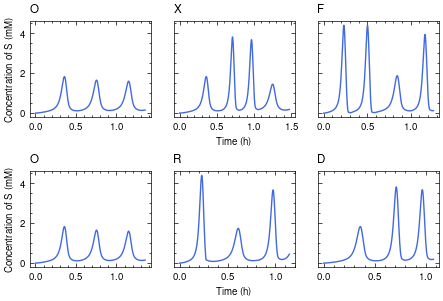

In [95]:
fig, ax = plt.subplots(2, 3, figsize=(
    4.5, 3), sharey=True, constrained_layout=True)
plot_oxford(ax.flatten())

ax[0][1].set_xlabel('Time (h)')
ax[1][1].set_xlabel('Time (h)')
ax[0][0].set_ylabel('Concentration of S (mM)')
ax[1][0].set_ylabel('Concentration of S (mM)')

for a in fig.axes:
    a.set_box_aspect(4/5)

plt.savefig('figs/fig3.png', dpi=300)

Figure 4. Stirring rate, role of time delays

In [96]:
files = [r'Data_sets/3a_fig2d_300rpm_osc_Chem_MH.csv',
         r'Data_sets/3a_fig2d_600rpm_osc_Chem_MH.csv', r'Data_sets/3a_fig2d_1200rpm_osc_Chem_MH.csv']

df_MH_Chem_fig2d_300rpm, df_MH_Chem_fig2d_600rpm, df_MH_Chem_fig2d_1200rpm = [
    pd.read_csv(file) for file in files]
df_list = [df_MH_Chem_fig2d_300rpm,
           df_MH_Chem_fig2d_600rpm, df_MH_Chem_fig2d_1200rpm]

cA2_tol = 14.5
CMC_3a = 1.56
rext = 14
tau = cA2_tol / rext

for df in df_list:
    df['cS'] /= CMC_3a
    df['tS'] /= tau
    df['tA2'] /= tau

# parameters
rs_ac, rds_ac, rs, rds, ro, rm = 1320, 870, 12.5, 210, 1e4, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.04, 0.04

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / \
    rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0, 0, 0, 0])
delayed_model_stirr1 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_stirr1.add_exp_data(df_MH_Chem_fig2d_300rpm)
delayed_model_stirr1.set_init_cond([0, 0, 0, 0])
c1, t1 = delayed_model_stirr1.simulate(exp=True, calcall=True, acc=200)

c1 = c1 * CMC_3a
t1 = t1 * tau

# Faster stirring
k1 = 1.1
k2 = 1.4
n = 2

# parameters
rs_ac, rds_ac, rs, rds, ro, rm = 1320, 870, 12.5, 210, 1e4, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.04, 0.04

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac * k1 / rext, rds_ac * \
    k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext, rm/rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2]) / n

init_cond = np.array([0, 0, 0])
delayed_model_stirr2 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_stirr2.add_exp_data(df_MH_Chem_fig2d_600rpm)
delayed_model_stirr2.set_init_cond([0, 0, 0, 0])
c2, t2 = delayed_model_stirr2.simulate(exp=True, calcall=True, acc=200)

c2 = c2 * CMC_3a
t2 = t2 * tau

# More faster stirring
k1 = 1.6
k2 = 1.8
n = 2.5

# parameters
rs_ac, rds_ac, rs, rds, ro, rm = 1320, 870, 12.5, 210, 1e4, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.04, 0.04

# Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac * k1 / rext, rds_ac * \
    k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext, rm/rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2]) / n

init_cond = np.array([0, 0, 0])
delayed_model_stirr3 = delayed_oscillation(
    delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_stirr3.add_exp_data(df_MH_Chem_fig2d_1200rpm)
delayed_model_stirr3.set_init_cond([0, 0, 0, 0])
c3, t3 = delayed_model_stirr3.simulate(exp=True, calcall=True, acc=200)

c3 = c3 * CMC_3a
t3 = t3 * tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


/Users/zhihengzhang/Documents/01_Research/03_Lab-SPF/Chemical_Oscillation_Model/osc_toolkit.py:289: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])
clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


In [97]:
c1_exp = delayed_model_stirr1._exp_data['cS'] * CMC_3a
t1_exp = delayed_model_stirr1._exp_data['tS'] * tau

c2_exp = delayed_model_stirr2._exp_data['cS'] * CMC_3a
t2_exp = delayed_model_stirr2._exp_data['tS'] * tau

c3_exp = delayed_model_stirr3._exp_data['cS'] * CMC_3a
t3_exp = delayed_model_stirr3._exp_data['tS'] * tau

In [98]:
def plot_diagram_stirr(ax):
    img = mpimg.imread('figs/effect_of_stirr.png')
    ax.imshow(img, aspect='auto')
    ax.set(xticks=[], yticks=[])


def plot_stir1(ax):
    ax.plot(t1, c1[1], label='Simulation', c='royalblue')
    ax.plot(t1_exp, c1_exp, marker='.', label='Experiment', c='navy')
    ax.legend(loc='upper right')


def plot_stir2(ax):
    ax.plot(t2, c2[1], label='Simulation', c='royalblue')
    ax.plot(t2_exp, c2_exp, marker='.', label='Experiment', c='navy')
    ax.legend(loc='upper right')


def plot_stir3(ax):
    ax.plot(t3, c3[1], label='Simulation', c='royalblue')
    ax.plot(t3_exp, c3_exp, marker='.', label='Experiment', c='navy')
    ax.legend(loc='upper right')

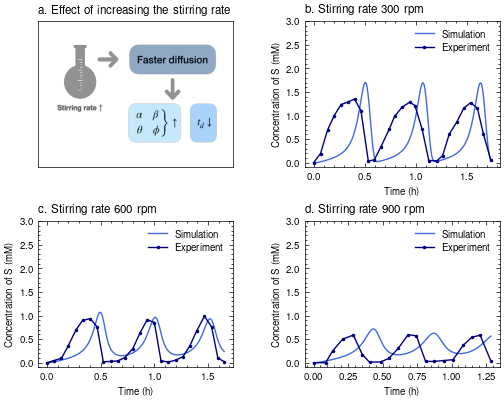

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(16/3, 4), constrained_layout=True)
funs = [plot_stir1, plot_stir2, plot_stir3]

plot_diagram_stirr(ax[0][0])

for i, a in enumerate(ax.flatten()[1:]):
    funs[i](a)
    a.set_ylim([-0.1, 3])
    a.set_xlabel('Time (h)')
    a.set_ylabel('Concentration of S (mM)')

title = ['a. Effect of increasing the stirring rate', 'b. Stirring rate 300 rpm',
         'c. Stirring rate 600 rpm', 'd. Stirring rate 900 rpm']
for i, a in enumerate(ax.flatten()):
    a.set_title(title[i], loc='left')
    a.set_box_aspect(3/4)

plt.savefig('figs/fig4.png', dpi=300)

Figure 5. Sync of 2 oscillators

In [100]:
file = r'Data_sets/C82_osc_LM.csv'
cmc_82 = 1.56
cmc_92 = 0.29
rext = 11.2
params = [cmc_82, rext]
df_c82LM = input_expdata(file, params)

file = r'Data_sets/C92_osc_LM.csv'
cmc_92 = 0.29
rext = 11.2
params = [cmc_92, rext]
df_c92LM = input_expdata(file, params)

cA2_tol = 16.300, tau = 1.455
cA2_tol = 15.180, tau = 1.355


In [101]:
#C82 parameters
rs_ac, rds_ac, rs, rds, ro, rm = 2896.32 , 1346.80   , 14.00  , 203.84, 1e4, 1e4
rext = 11.2
lam, m = cmc_82/15, 2
td1, td2 = 0.02, 0.02

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params1 = [alpha, beta, theta, phi, ep, delta]
consts1 = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0])
delayed_C82 = delayed_oscillation(delayed_full_4vars, delay=delay, params=params1, consts=consts1, init_cond=init_cond)
delayed_C82.add_exp_data(df_c82LM)

#The vars in the ODEs are cA2, cS, cO. Which is different from the experiment data. The initial conditions are set manually.
delayed_C82.set_init_cond([0, 0, 0, 0])

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [4.50370500e-03 5.89633333e-04 1.99099259e+00]
Initial condition is set as [0, 0, 0, 0]


In [102]:
#C92 parameters
rs_ac, rds_ac, rs, rds, ro, rm = 245.056, 359.52 ,  18.48 , 635.6, 1e4, 1e4
rext = 11.2
lam, m = cmc_92/15, 2
td1, td2 = 0.02, 0.02

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params2 = [alpha, beta, theta, phi, ep, delta]
consts2 = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0])
delayed_C92 = delayed_oscillation(delayed_full_4vars, delay=delay, params=params2, consts=consts2, init_cond=init_cond)
delayed_C92.add_exp_data(df_c92LM)

#The vars in the ODEs are cA2, cS, cO. Which is different from the experiment data. The initial conditions are set manually.
delayed_C92.set_init_cond([0, 0, 0, 0])

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.00535852 0.00347245 1.98928295]
Initial condition is set as [0, 0, 0, 0]


In [103]:
tau = 15/11.2
c82, t82 = delayed_C82.simulate(t=2, calcall=True, acc=200)
c92, t92 = delayed_C92.simulate(t=2, calcall=True, acc=200)

c82 = c82 * cmc_82
c92 = c92 * cmc_92
t82 = t82 * tau
t92 = t92 * tau

c82_exp = delayed_C82._exp_data['cS'] * cmc_82
c92_exp = delayed_C92._exp_data['cS'] * cmc_92
t82_exp = delayed_C82._exp_data['tS'] * tau
t92_exp = delayed_C92._exp_data['tS'] * tau

Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.
Generating, compiling, and loading C code.


/Users/zhihengzhang/Documents/01_Research/03_Lab-SPF/Chemical_Oscillation_Model/osc_toolkit.py:289: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])
clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]


Using default integration parameters.


ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


In [104]:
delay = [0.02, 0.02]
init_cond = [0, 0, 0, 0, 0, 0]
mixed_8292 = mixed_delayed_oscillation(delayed_full_two_thiols, delay, params1, params2, consts1, consts2, init_cond)

In [105]:
cmix, tmix = mixed_8292.simulate(t=2, acc=200, calcall=True)

c82mix = cmix[1] * cmc_82
c92mix = cmix[2] * cmc_92
tmix = tmix * tau

df_mix89LM = pd.read_csv(r'Data_sets/C82+C92_osc_LM.csv')
c82mix_exp = df_mix89LM['cS28']
c92mix_exp = df_mix89LM['cS29']
tmix_exp = df_mix89LM['tS']

def plot_mixexp(axsep, axmix):
    axsep.plot(t82_exp, c82_exp, c='navy', marker='.', label='$S1$ Experiment')
    axsep.plot(t92_exp, c92_exp, c='green', marker='.', label='$S2$ Experiment')
    axmix.plot(tmix_exp, c82mix_exp, c='navy', marker='.', label='$S1$ Experiment')
    axmix.plot(tmix_exp, c92mix_exp, c='green', marker='.', label='$S2$ Experiment')
    axsep.legend(loc='upper right')
    axmix.legend(loc='upper right')
    axsep.set_ylim([-0.05, 2])
    axmix.set_ylim([-0.05, 2])

def plot_mix(axsep, axmix):
    axsep.plot(t82, c82[1], c='royalblue', label='$S1$ Simulation')
    axsep.plot(t92, c92[1], c='limegreen', label='$S2$ Simulation')
    axmix.plot(tmix, c82mix, c='royalblue', label='$S1$ Simulation')
    axmix.plot(tmix, c92mix, c='limegreen', label='$S2$ Simulation')
    axsep.legend(loc='upper right')
    axmix.legend(loc='upper right')
    axsep.set_ylim([-0.05, 2])
    axmix.set_ylim([-0.05, 2])
    axsep.set_xlim([-0.05, 1.8])
    axmix.set_xlim([-0.05, 1.8])

Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


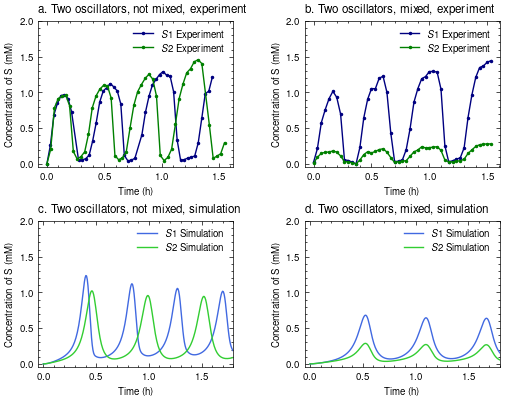

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(16/3, 4), constrained_layout=True)

plot_mixexp(ax[0][0], ax[0][1])
plot_mix(ax[1][0], ax[1][1])

title = ['a. Two oscillators, not mixed, experiment', 'b. Two oscillators, mixed, experiment',
         'c. Two oscillators, not mixed, simulation', 'd. Two oscillators, mixed, simulation']
for i, a in enumerate(fig.axes):
    a.set(xlabel='Time (h)', ylabel='Concentration of S (mM)')
    a.set_title(title[i], loc='left')
    a.set_box_aspect(3/4)

fig.savefig('figs/fig5.png', dpi=300)